In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("diamonds.csv")

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Preprocessing

In [7]:
df = df.drop(columns = ["Unnamed: 0"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.duplicated().sum()

np.int64(146)

In [10]:
df = df.drop_duplicates(keep = "first")

In [11]:
df.duplicated().sum()

np.int64(0)

<Axes: >

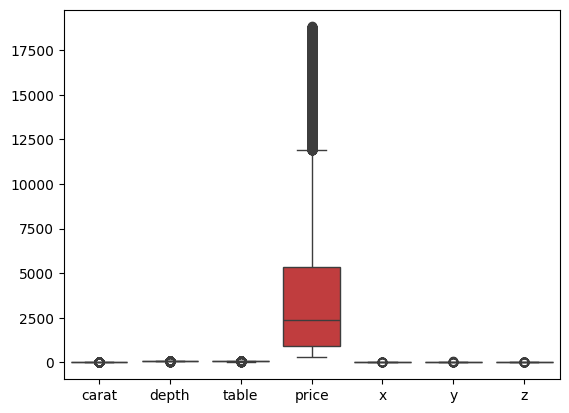

In [12]:
sns.boxplot(df)

In [13]:
num_cols = df.select_dtypes(include = "number").columns
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = "iqr",tail = "both",fold = 1.5)
df[num_cols] = winsor.fit_transform(df[num_cols])

<Axes: >

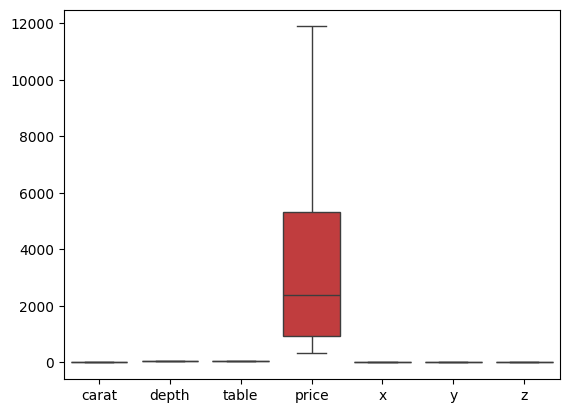

In [14]:
sns.boxplot(df)

## Model Training

In [15]:
y = df["price"]
X = df.drop(columns = ["price"])

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   x        53794 non-null  float64
 7   y        53794 non-null  float64
 8   z        53794 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [19]:
numerical_cols = ["carat","depth","table","x","y","z"]
categorical_cols = ["cut","color","clarity"]
ts = ColumnTransformer(transformers = [("num",StandardScaler(),numerical_cols),
                                       ("cat",OneHotEncoder(sparse_output = False,drop = "first",handle_unknown = "ignore"),categorical_cols)],
                                      remainder = "passthrough"
                      )

In [24]:
X_train_trans = ts.fit_transform(X_train)
features = ts.get_feature_names_out()
X_train_trans = pd.DataFrame(X_train_trans,columns = features)
X_train_trans.head()

,num__carat,num__depth,num__table,num__x,num__y,num__z,cat__cut_Good,cat__cut_Ideal,cat__cut_Premium,cat__cut_Very Good,...,cat__color_H,cat__color_I,cat__color_J,cat__clarity_IF,cat__clarity_SI1,cat__clarity_SI2,cat__clarity_VS1,cat__clarity_VS2,cat__clarity_VVS1,cat__clarity_VVS2
0,-0.181476,2.352872,-2.057303,-0.081828,-0.138292,0.188816,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.159612,-0.277957,-0.667752,0.025277,0.086456,0.030026,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.077887,0.900026,-0.204568,-1.277834,-1.333950,-1.225855,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.203340,0.821494,0.721799,-0.072902,-0.120312,-0.013280,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.115885,0.193237,-0.667752,0.052053,0.077466,0.087768,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
X_test_trans = ts.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans,columns = features)
X_test_trans.head()

,num__carat,num__depth,num__table,num__x,num__y,num__z,cat__cut_Good,cat__cut_Ideal,cat__cut_Premium,cat__cut_Very Good,...,cat__color_H,cat__color_I,cat__color_J,cat__clarity_IF,cat__clarity_SI1,cat__clarity_SI2,cat__clarity_VS1,cat__clarity_VS2,cat__clarity_VVS1,cat__clarity_VVS2
0,-0.072158,-0.906215,0.721799,0.185935,0.104436,0.044461,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.034159,0.585898,0.258615,-1.215356,-1.262031,-1.182549,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.496298,0.821494,-0.667752,0.587578,0.634841,0.708490,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.277661,0.114704,-1.130936,0.453697,0.482012,0.477524,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.299525,-0.984747,-0.204568,0.525101,0.571911,0.434218,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"],
    "p" : [1,2]
}
grid = GridSearchCV(estimator = knn,param_grid = param_grid,cv = 5,scoring = "r2",verbose = 1)
grid.fit(X_train_trans,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


## Model Building

In [28]:
knn = KNeighborsRegressor(n_neighbors = 5,weights = "distance",p = 1)
knn.fit(X_train_trans,y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
## Training score
from sklearn.metrics import r2_score
y_train_pred = knn.predict(X_train_trans)
y_train_score = r2_score(y_train,y_train_pred)
print("Training Score :",y_train_score)

Training Score : 0.9999968122054409


In [30]:
## Testing Score
y_test_pred = knn.predict(X_test_trans)
y_test_score = r2_score(y_test,y_test_pred)
print("Testing Score :",y_test_score)

Testing Score : 0.9747569282348587


## Pickle Creation

In [31]:
import pickle

In [32]:
with open("diamond_price_prediction.pkl","wb") as f:
    pickle.dump(knn,f)